# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane appear to be the most effective treatments as mice in these groups had the smallest mean tumor volumes. These mean values were smaller than the starting tumor size (45 (mm3)), meaning these two drug treatments often shrunk tumors. Ceftamin, Infubinol and Propriva preformed well also, but tumors did not shrink.

- Each treatment group contained approximately 150-250 mice.

- The gender distribution among mice in the study was almost the same for males and females.

- The boxplot of the four selected treatments once again shows Capomulin and Ramicane as the more effective treatments. However, one mouse in the Infubinol treatment showed a reduction in tumor size. This data point is an outlier, though.

- There exists a fairly strong, positive correlation (r = 0.84) between mouse weight and average tumor size for the Capomulin group. This relationship can be modeled by the equation $y = 0.95x + 21.55$ where $x$ is mouse weight and $y$ is average tumor volume. Hence, for each additional gram of weight, the average tumor size for a mouse increases by 0.95 mm3.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import matplotlib.cm as cm
import numpy as np

pd.set_option('display.max_rows', None)

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
mouse_study_df.head()


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_study_df['Mouse ID'].unique().size

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Adds a new column with boolean values for whether or not the row is a duplicate
mouse_study_df['Dup'] = mouse_study_df.duplicated(subset =['Mouse ID', 'Timepoint'],keep = False)
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Dup
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Pulls all rows of duplicate ID and timepoint data
dups = mouse_study_df.loc[mouse_study_df['Dup'] == True]
dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Dup
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned = mouse_study_df[mouse_study_df['Mouse ID'] != 'g989']
cleaned.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Dup
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned['Mouse ID'].unique().size

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor = cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
med_tumor = cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var_tumor = cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
sd_tumor = cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
se_tumor = cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

sum_stats = pd.DataFrame({'Mean Tumor Volume': mean_tumor,\
                         'Median Tumor Volume': med_tumor,\
                         'Tumor Volume Variance': var_tumor,\
                         'Tumor Volume Std. Dev.': sd_tumor,\
                         'Tumor Volume Std. Err.': se_tumor})

sum_stats



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
sum_stats2 = cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

sum_stats2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Create df of counts by Drug Regimen
count_bydrug = cleaned.groupby(['Drug Regimen'])['Mouse ID'].count()
count_bydrug.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

<function matplotlib.pyplot.show(*args, **kw)>

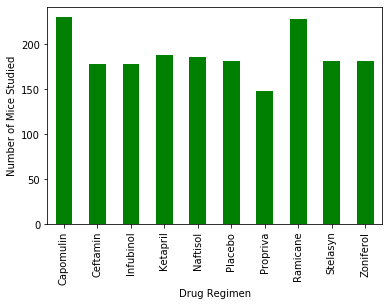

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_bydrug.plot(kind = "bar", color = 'green')
plt.ylabel('Number of Mice Studied')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

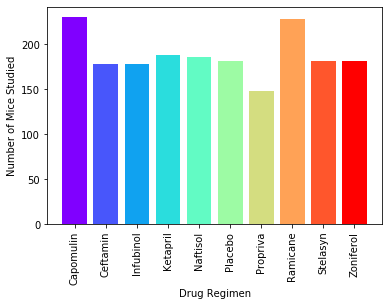

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Playing around with different color possibilities
colors = cm.rainbow(np.linspace(0, 1, len(count_bydrug)))

plt.bar(count_bydrug.index, count_bydrug, color = colors)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Studied')

plt.xticks(rotation = 90)

plt.show

In [12]:
# Group mice by sex
count_bysex = cleaned.groupby(['Sex'])['Mouse ID'].count()
count_bysex

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

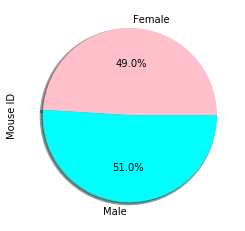

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count_bysex.plot(kind = 'pie', autopct='%1.1f%%',colors = ['pink','cyan'], shadow=True, wedgeprops = {'linewidth': 3})

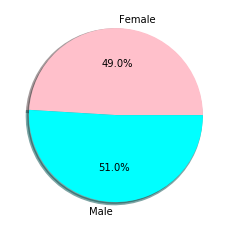

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(count_bysex, labels = count_bysex.index, colors = ['pink','cyan'],autopct="%1.1f%%", shadow=True, wedgeprops = {'linewidth': 3})

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
fourdrugs = cleaned.loc[(cleaned['Drug Regimen'] == 'Capomulin') | (cleaned['Drug Regimen'] == 'Ramicane') | (cleaned['Drug Regimen'] == 'Infubinol') | (cleaned['Drug Regimen'] == 'Ceftamin')]
#fourdrugs
# Start by getting the last (greatest) timepoint for each mouse
# Use .idxmax() instead of .idmax() to avoid an error
maxtime_size = fourdrugs.loc[fourdrugs.groupby('Mouse ID')['Timepoint'].idxmax()]

maxtime_size_index = maxtime_size[['Mouse ID','Tumor Volume (mm3)']]
maxtime_size_index['Tumor End Size'] = maxtime_size['Tumor Volume (mm3)']
maxtime_size_index.drop(columns = ['Tumor Volume (mm3)'], inplace = True)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cleaned2 = pd.merge(fourdrugs, maxtime_size_index, on = 'Mouse ID', how = 'right')
cleaned2

# Create a data frame with only the ending timepoint for each mouse
fourdrugs2 = cleaned2.groupby('Mouse ID').max()
fourdrugs2.head()

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Dup,Tumor End Size
Mouse ID,,,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2,False,67.973419
a251,Infubinol,Female,21,25,45,65.525743,1,False,65.525743
a275,Ceftamin,Female,20,28,45,62.999356,3,False,62.999356
a411,Ramicane,Male,3,22,45,45.466677,1,False,38.407618
a444,Ramicane,Female,10,25,45,45.000000,0,False,43.047543


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = list(cleaned2['Drug Regimen'].unique())

# Quantitatively search for outliers in data sets and print possible outliers
for x in treatments:
    # Create a list of tumor sizes for the given drug
    drug = fourdrugs2.loc[fourdrugs2['Drug Regimen'] == x]['Tumor End Size'].sort_values()
    # Find quantiles for tumor size data
    drugquant = drug.quantile([.25,.5,.75])
    # Calculate bounds for outliers
    lowerq = drugquant[0.25]
    upperq = drugquant[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Pull outliers from data set using conditional
    outliers = drug.loc[(drug < lower_bound) | (drug > upper_bound)]
    # Print results
    print(f"Possible outliers for {x}: {outliers}")

Possible outliers for Ramicane: Series([], Name: Tumor End Size, dtype: float64)
Possible outliers for Capomulin: Series([], Name: Tumor End Size, dtype: float64)
Possible outliers for Infubinol: Mouse ID
c326    36.321346
Name: Tumor End Size, dtype: float64
Possible outliers for Ceftamin: Series([], Name: Tumor End Size, dtype: float64)


<function matplotlib.pyplot.show(*args, **kw)>

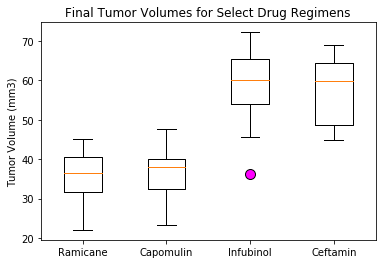

In [17]:
# Create four lists of final tumor sizes for the four selected drug treatment groups
Ramicane = fourdrugs2.loc[fourdrugs2['Drug Regimen'] == 'Ramicane']['Tumor End Size'].sort_values()
Infubinol = fourdrugs2.loc[fourdrugs2['Drug Regimen'] == 'Infubinol']['Tumor End Size'].sort_values()
Capomulin = fourdrugs2.loc[fourdrugs2['Drug Regimen'] == 'Capomulin']['Tumor End Size'].sort_values()
Ceftamin = fourdrugs2.loc[fourdrugs2['Drug Regimen'] == 'Ceftamin']['Tumor End Size'].sort_values()

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot([Ramicane, Capomulin, Infubinol, Ceftamin],flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'fuchsia'})
ax.set_xticklabels(treatments)
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Final Tumor Volumes for Select Drug Regimens')

plt.show

## Line and Scatter Plots

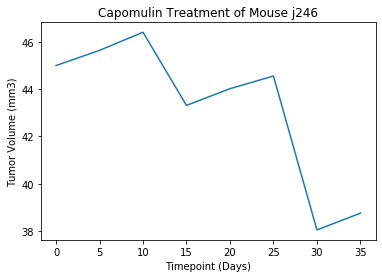

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Pull a mouse treated with Capomulin
CaMouse = cleaned2.loc[cleaned2["Mouse ID"] == "j246"]

# Plot j246 data
fig, ax = plt.subplots()
ax.plot(CaMouse['Timepoint'], CaMouse['Tumor Volume (mm3)'])
ax.set_xlabel('Timepoint (Days)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Capomulin Treatment of Mouse j246')

plt.show()

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Pull data frame with average tumor size info
CapomulinFull = cleaned2.loc[cleaned2['Drug Regimen'] == 'Capomulin']
AvTumorCa = CapomulinFull.groupby(['Mouse ID']).mean()

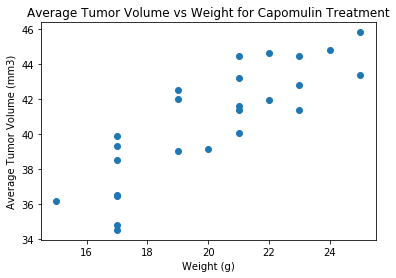

In [20]:
# Plot Data
fig, ax = plt.subplots()
ax.scatter(AvTumorCa['Weight (g)'],AvTumorCa['Tumor Volume (mm3)'])

ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')
ax.set_title('Average Tumor Volume vs Weight for Capomulin Treatment')

plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate correlation coef. (Use Pearson)
correlation = round(st.pearsonr(AvTumorCa['Weight (g)'],AvTumorCa['Tumor Volume (mm3)'])[0],2)
print(f"The Correlation between mouse weight and avg. tumor size is {correlation}.")

The Correlation between mouse weight and avg. tumor size is 0.84.


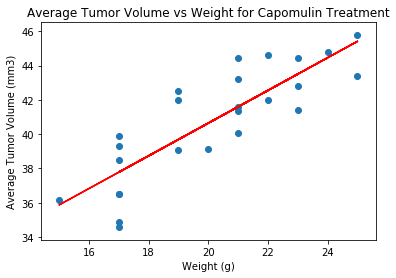

A linear relationship between mouse weight and avg. tumor volume is given by y = 0.95x + 21.55.


In [22]:
# Calculate values needed for regression
x_values = AvTumorCa['Weight (g)']
y_values = AvTumorCa['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig, ax = plt.subplots()
ax.plot(x_values,regress_values,"r-")
ax.scatter(AvTumorCa['Weight (g)'],AvTumorCa['Tumor Volume (mm3)'])

#ax.annotate(line_eq,(0.1,0.1),fontsize=15,color="red")
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')
ax.set_title('Average Tumor Volume vs Weight for Capomulin Treatment')

plt.show()
print(f"A linear relationship between mouse weight and avg. tumor volume is given by {line_eq}.")